In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import pickle

In [ ]:
import pandas as pd

# Try different encodings
encodings = ['latin1']

for encoding in encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        print(f"File read successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Could not read the file with encoding: {encoding}")

# Continue with your data processing using 'df'


File read successfully with encoding: latin1


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5574, 10)

In [ ]:
#1.Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5574 non-null   object
 1   v2          5573 non-null   object
 2   Unnamed: 2  49 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
 5   v1.1        5572 non-null   object
 6   v2.1        5572 non-null   object
 7   Unnamed: 7  50 non-null     object
 8   Unnamed: 8  12 non-null     object
 9   Unnamed: 9  6 non-null      object
dtypes: object(10)
memory usage: 435.6+ KB


In [ ]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
df.sample(10)

,v1,v2,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9
1358,ham,Good afternoon loverboy ! How goes you day ? A...,ham,If i start sending blackberry torch to nigeria...,NaN,NaN,NaN
4138,ham,Just got to &lt;#&gt;,ham,Ever green quote ever told by Jerry in cartoon...,NaN,NaN,NaN
3445,ham,Yes but I don't care cause I know its there!,ham,"Mon okie lor... Haha, best is cheap n gd food ...",NaN,NaN,NaN
1125,ham,Aiyar sorry lor forgot 2 tell u...,spam,For taking part in our mobile survey yesterday...,NaN,NaN,NaN
1903,ham,My sister got placed in birla soft da:-),spam,Free entry in 2 a weekly comp for a chance to ...,NaN,NaN,NaN
3512,ham,I'm serious. You are in the money base,ham,Staff of placement training in Amrita college.,NaN,NaN,NaN
4629,spam,Todays Voda numbers ending with 7634 are selec...,ham,Everybody had fun this evening. Miss you.,NaN,NaN,NaN
3950,ham,HMM yeah if your not too grooved out! And im l...,ham,Hi dude hw r u da realy mising u today,NaN,NaN,NaN
4451,ham,"Awesome, be there in a minute",ham,I've told you everything will stop. Just dont ...,NaN,NaN,NaN
4689,ham,Hmmm.but you should give it on one day..,ham,Ok no prob,NaN,NaN,NaN


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9
4153,ham,What's nannys address?,ham,Haf u eaten? Wat time u wan me 2 come?,NaN,NaN,NaN
3483,spam,Do you want a NEW video phone750 anytime any n...,ham,Tell my bad character which u Dnt lik in me. ...,NaN,NaN,NaN
4047,spam,Win a å£1000 cash prize or a prize worth å£5000,ham,Lol or I could just starve and lose a pound by...,NaN,NaN,NaN
3197,ham,"I av a new number, . Wil u only use this one,ta.",ham,7 lor... Change 2 suntec... Wat time u coming?,NaN,NaN,NaN
1961,spam,Guess what! Somebody you know secretly fancies...,ham,LOL that would be awesome payback.,NaN,NaN,NaN


In [ ]:
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,"Go until jurong point, crazy.. Available only ...",ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

target           0
text             1
v1.1             2
v2.1             2
Unnamed: 7    5524
Unnamed: 8    5562
Unnamed: 9    5568
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(5574, 7)

In [ ]:
#2.Exploratory Data Analysis
df.head()

,target,text,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,"Go until jurong point, crazy.. Available only ...",ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['target'].value_counts()

0    4825
2     747
1       2
Name: target, dtype: int64

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

# Apply tokenization with a check for non-string input
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))
df.head()




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,num_words
0,0,"Go until jurong point, crazy.. Available only ...",ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,24
1,0,Ok lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,8
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,37
3,0,U dun say so early hor... U c already then say...,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,13
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,15


In [ ]:
import pandas as pd
import nltk

# Download the Punkt tokenizer for tokenization (if not already downloaded)
nltk.download('punkt')

# Assuming df is your DataFrame
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))) if pd.notna(x) else 0)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,num_words
0,0,"Go until jurong point, crazy.. Available only ...",ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,24
1,0,Ok lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,8
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,37
3,0,U dun say so early hor... U c already then say...,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,13
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,15


In [ ]:
import pandas as pd
import nltk

# Download the Punkt tokenizer for sentence tokenization (if not already downloaded)
nltk.download('punkt')

# Assuming df is your DataFrame
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))) if pd.notna(x) else 0)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,v1.1,v2.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,24,2
1,0,Ok lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,8,2
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,37,2
3,0,U dun say so early hor... U c already then say...,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,15,1


In [ ]:
print(df.columns)


Index(['target', 'text', 'v1.1', 'v2.1', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'num_words', 'num_sentences'],
      dtype='object')


In [ ]:
import nltk

# Check for NaN values in the 'text' column and replace them with an empty string
df['text'] = df['text'].fillna('')

# Create new columns
df['num_characters'] = df['text'].apply(lambda x: len(str(x)))
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))



In [ ]:
print(df.head())


   target                                               text  v1.1  \
0       0  Go until jurong point, crazy.. Available only ...   ham   
1       0                      Ok lar... Joking wif u oni...   ham   
2       2  Free entry in 2 a wkly comp to win FA Cup fina...  spam   
3       0  U dun say so early hor... U c already then say...   ham   
4       0  Nah I don't think he goes to usf, he lives aro...   ham   

                                                v2.1 Unnamed: 7 Unnamed: 8  \
0  Go until jurong point, crazy.. Available only ...        NaN        NaN   
1                      Ok lar... Joking wif u oni...        NaN        NaN   
2  Free entry in 2 a wkly comp to win FA Cup fina...        NaN        NaN   
3  U dun say so early hor... U c already then say...        NaN        NaN   
4  Nah I don't think he goes to usf, he lives aro...        NaN        NaN   

  Unnamed: 9  num_words  num_sentences  num_characters  
0        NaN         24              2             11

In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.021554,17.275440,1.837720
std,58.013147,13.987267,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.000000,2.000000,2.000000
mean,28.500000,6.500000,0.500000
std,40.305087,9.192388,0.707107
min,0.000000,0.000000,0.000000
25%,14.250000,3.250000,0.250000
50%,28.500000,6.500000,0.500000
75%,42.750000,9.750000,0.750000
max,57.000000,13.000000,1.000000


<Axes: xlabel='num_characters', ylabel='Count'>

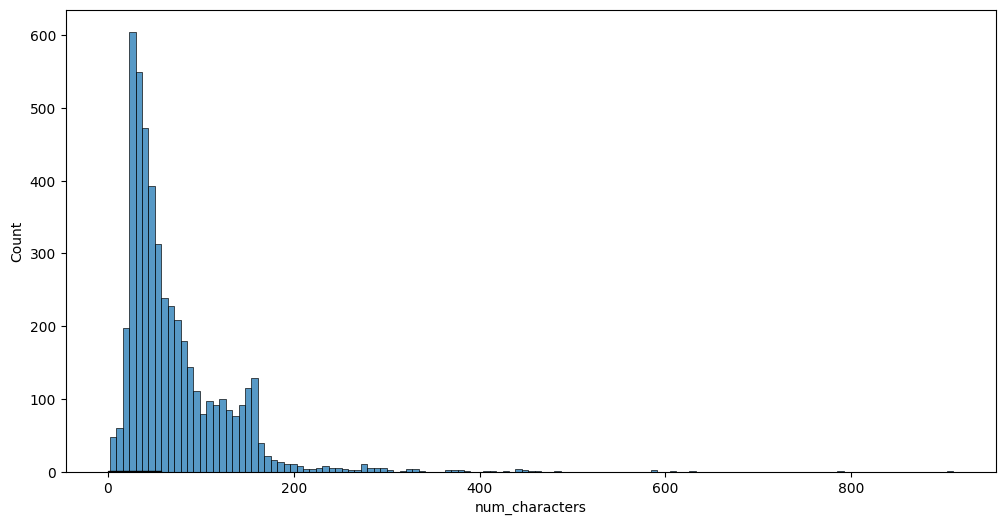

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

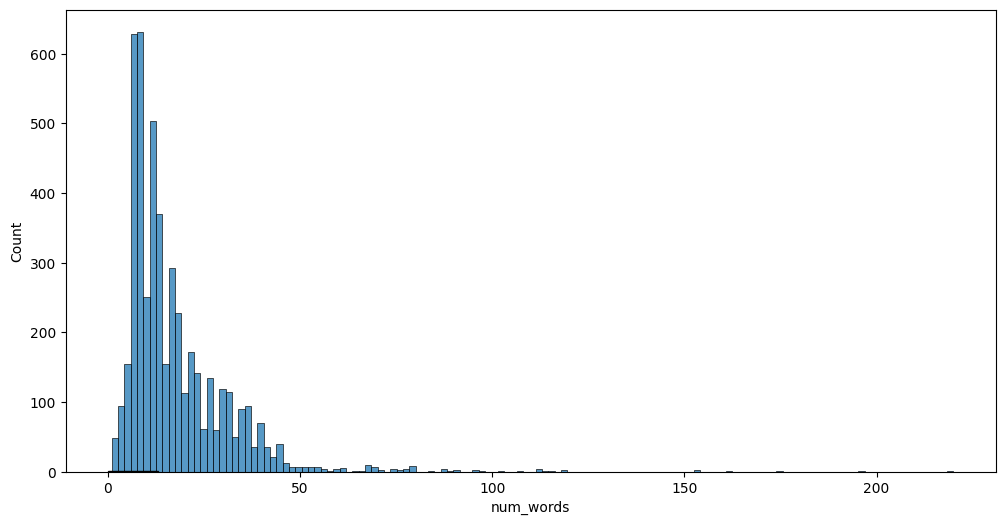

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

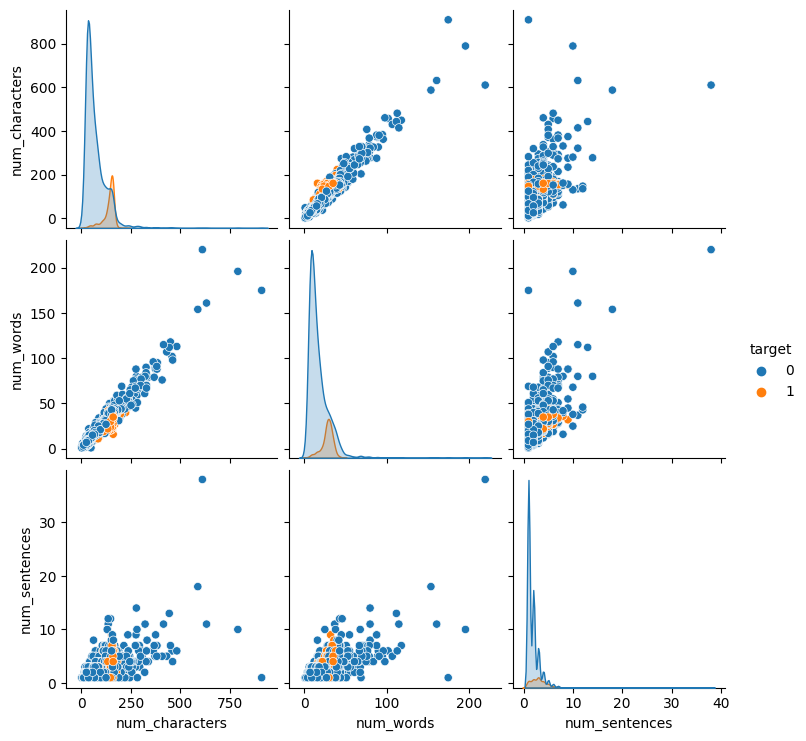

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-97-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

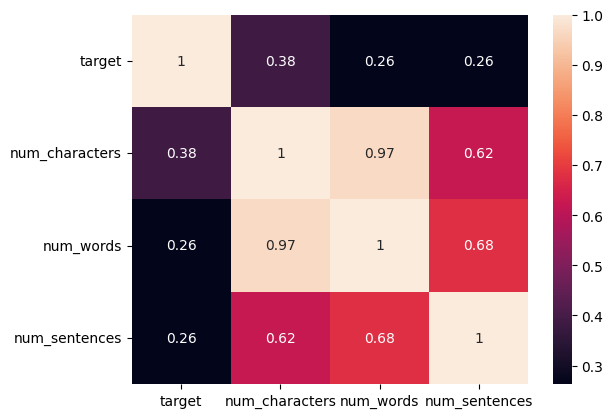

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#3.Data Preprocessing
#.Lower case .Tokenization .Removing special characters .Removing stop words and punctuation .Stemming

In [ ]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

t_text = transform_text("Hi! I will be home tonight.Do you want something ?")

print(t_text)

hi i will be home you want someth


In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['t_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
print(df['t_text'].apply(type).value_counts())


<class 'str'>    5169
Name: t_text, dtype: int64


In [ ]:
df['t_text'] = df['t_text'].astype(str)


In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['t_text'].str.cat(sep=" "))


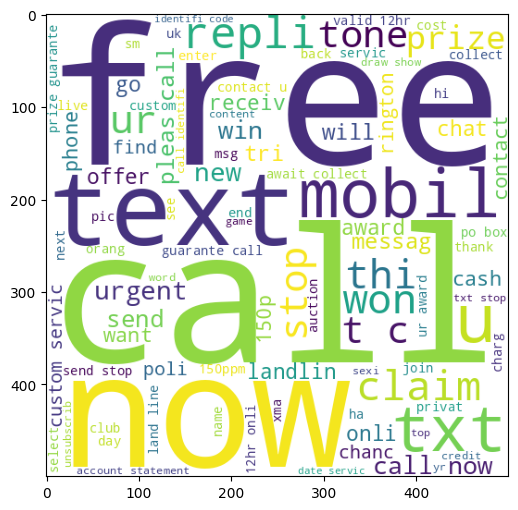

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['t_text'].str.cat(sep=" "))

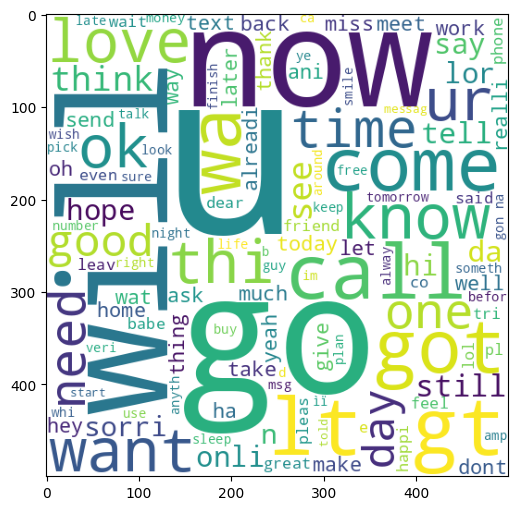

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['t_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

14475

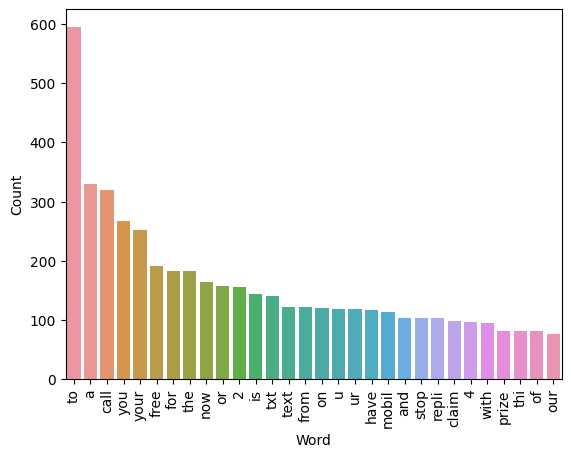

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of words or tokens
# Example: spam_corpus = ["word1", "word2", "word3", ...]

# Create a DataFrame from Counter result
df_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using Seaborn barplot
sns.barplot(x='Word', y='Count', data=df_counts)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['t_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

62812

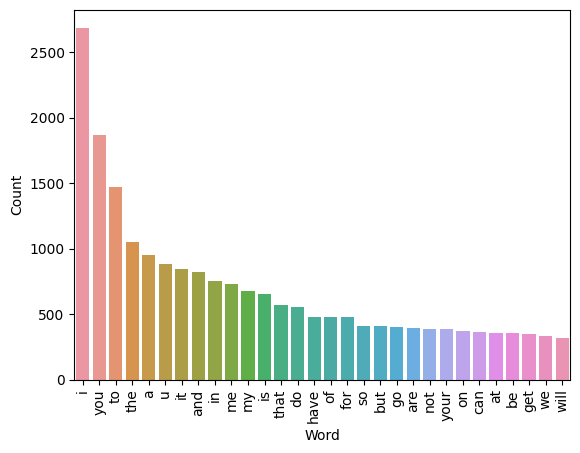

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of words or tokens
# Example: ham_corpus = ["word1", "word2", "word3", ...]

# Create a DataFrame from Counter result
df_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using Seaborn barplot
sns.barplot(x='Word', y='Count', data=df_counts)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [ ]:
#4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['t_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))



0.8771760154738878
[[792 104]
 [ 23 115]]


In [ ]:
print(precision_score(y_test, y_pred1, average='micro'))
# or
print(precision_score(y_test, y_pred1, average='macro'))
# or
print(precision_score(y_test, y_pred1, average='weighted'))



0.8771760154738878
0.7484466481777181
0.9121662126248603


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]


In [ ]:
print(precision_score(y_test, y_pred2, pos_label=0))
# or
#rint(precision_score(y_test, y_pred2, pos_label=2))


0.9644779332615716


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))


0.9806576402321083
[[893   3]
 [ 17 121]]


In [ ]:
from sklearn.metrics import precision_score

# Assuming you have defined and assigned values to y_test and y_pred3
y_test = [0, 1, 0, 1, 1, 0, 1, 0]  # Replace this with your actual y_test values
y_pred3 = [0, 1, 1, 1, 0, 0, 1, 0]  # Replace this with your actual y_pred3 values

print(precision_score(y_test, y_pred3, pos_label=0))





0.75


In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)

In [ ]:
voting = VotingClassifier(estimators = [('svm',svc),('nb',mnb),('et',etc)],voting = 'soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred1, average='micro'))

In [ ]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
clf = StackingClassifier(estimators = estimators,final_estimator = final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred1, average='micro'))

In [ ]:
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(mnb,open('model2.pkl','wb'))

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer2.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model2.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model1.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)